In [27]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
import numpy as np
import matplotlib.pyplot as plt
from qiskit import transpile
from qiskit_experiments.framework import BackendTiming, BaseExperiment, Options
from qiskit_experiments.library import T1, Rabi
from qiskit import pulse
from qiskit.circuit import Parameter
from qiskit_experiments.library import T2Ramsey
from qiskit_experiments.library.characterization import Tphi




SHOTS = 1000  # Default number of shots
QUBIT = 0    # Default qubit index

# Initialize Qiskit Runtime service
service = QiskitRuntimeService()
backend = service.backend('ibm_kyiv')


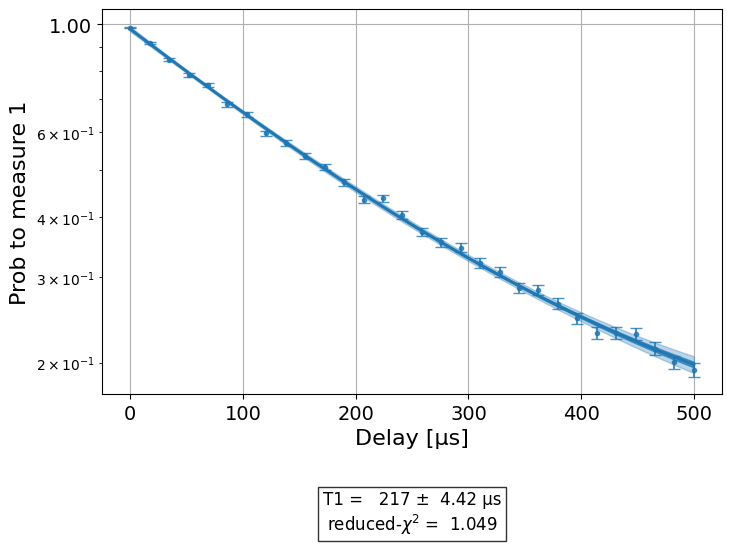

In [7]:
t1 = T1(physical_qubits=(QUBIT,),
        delays=np.linspace(0, 500e-6, 30),
        backend=backend
        )

plotter = t1.analysis.plotter

plotter.set_figure_options(
    ylabel="Prob to measure 1",
    # xlim=(50e-6, 250e-6),
    yscale="log"
)

t1_data = t1.run().block_for_results()
t1_data.figure(0)


/var/folders/h_/vy4w9dxn1tj1hk2f15n3qn3m0000gn/T/ipykernel_57258/1981992219.py:1: DeprecationWarning: The function ``qiskit.pulse.builder.build()`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  with pulse.build() as sched:
/var/folders/h_/vy4w9dxn1tj1hk2f15n3qn3m0000gn/T/ipykernel_57258/1981992219.py:4: DeprecationWarning: The class ``qiskit.pulse.channels.Channel`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  pulse.DriveChannel(0)
/var/folders/h_/vy4w9dxn1tj1hk2f15n3qn3m0000gn/T/ipykernel_57258/1981992219.py:2: DeprecationWarning: The function ``qiskit.pulse.builder.play()`` is deprecated as of Qiskit 1.3. It will be removed in Qisk

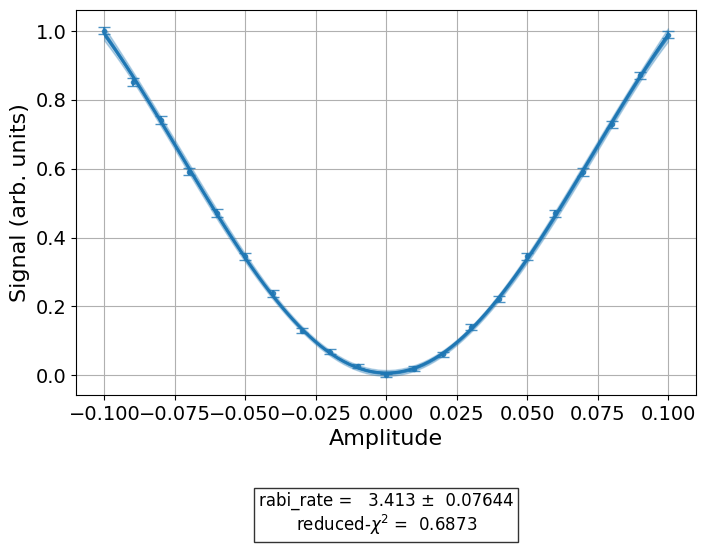

In [8]:
with pulse.build() as sched:
    pulse.play(
        pulse.Gaussian(160, Parameter("amp"), sigma=40),
        pulse.DriveChannel(0)
    )

rabi = Rabi(
    physical_qubits=(QUBIT,),
    backend=backend,
    schedule=sched,
    amplitudes=np.linspace(-0.1, 0.1, 21),
)

rabi_data = rabi.run().block_for_results()
rabi_data.figure(0)

     ┌────┐┌─────────────────┐┌─────────┐ ░ ┌────┐ ░ ┌─┐
  q: ┤ √X ├┤ Delay(1e-06[s]) ├┤ Rz(π/5) ├─░─┤ √X ├─░─┤M├
     └────┘└─────────────────┘└─────────┘ ░ └────┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════╩═
                                                      0 


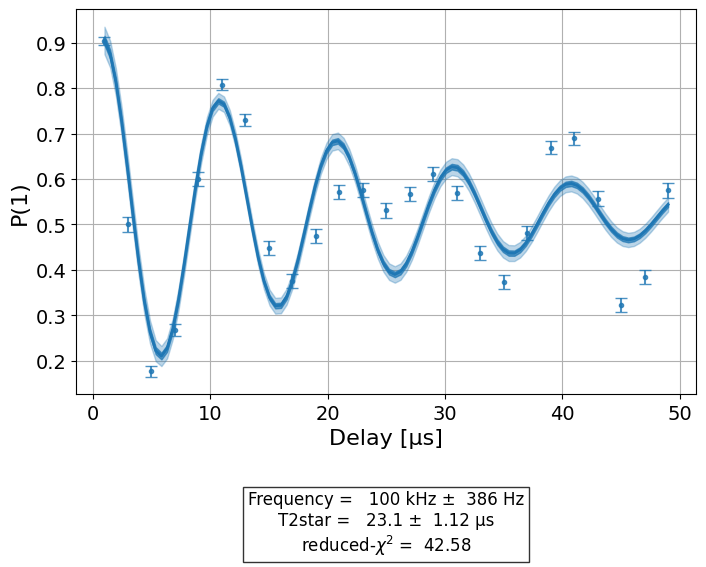

AnalysisResult
- name: @Parameters_T2RamseyAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_cos_decay(x) = amp * exp(-x / tau) * cos(2 * pi * freq * x + phi) + base
 - success: True
 - number of function evals: 126
 - degree of freedom: 20
 - chi-square: 851.6989934718275
 - reduced chi-square: 42.584949673591375
 - Akaike info crit.: 98.20893363727298
 - Bayesian info crit.: 104.30331276161398
 - init params:
  * amp = 0.5
  * tau = 4.664973834344821e-05
  * freq = 100000.0000000005
  * phi = 1.5707963267948966
  * base = 0.5356643356643356
 - fit params:
  * amp = 0.4005229252713702 ± 0.0109068171600985
  * tau = 2.3127438631053046e-05 ± 1.1248426852689338e-06
  * freq = 100409.77571685985 ± 386.42728506820305
  * phi = -0.5881251387716027 ± 0.037151502268559886
  * base = 0.5215078497154997 ± 0.0030517220107342544
 - correlations:
  * (freq, phi) = -0.7782261910958782
  * (amp, tau) = -0.6915699185540645
  * (freq, base) = -0.134064

In [9]:
delays = list(np.arange(1e-6, 50e-6, 2e-6))
exp1 = T2Ramsey((QUBIT,), delays, osc_freq=1e5)

print(exp1.circuits()[0])

# Set scheduling method so circuit is scheduled for delay noise simulation
exp1.set_transpile_options(scheduling_method='asap')

# Run experiment
expdata1 = exp1.run(backend=backend, shots=SHOTS).block_for_results()

# Display the figure
display(expdata1.figure(0))
# Print results
for result in expdata1.analysis_results():
    print(result)


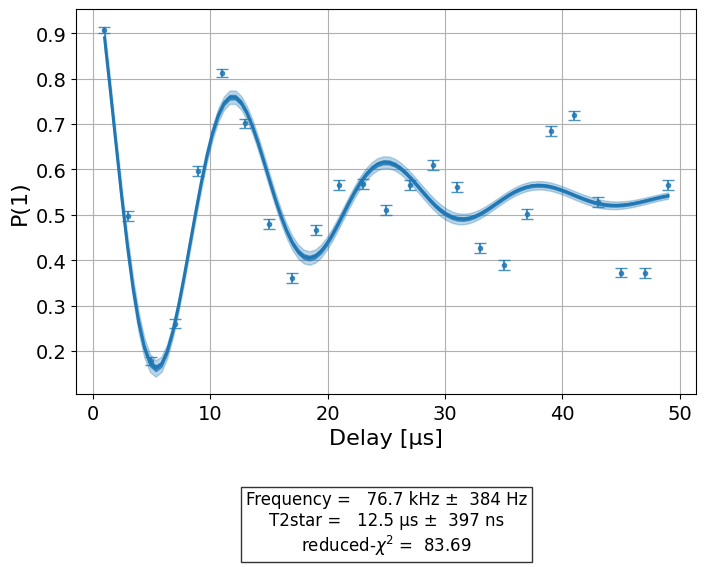

AnalysisResult
- name: @Parameters_T2RamseyAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_cos_decay(x) = amp * exp(-x / tau) * cos(2 * pi * freq * x + phi) + base
 - success: True
 - number of function evals: 121
 - degree of freedom: 20
 - chi-square: 1673.7079419489176
 - reduced chi-square: 83.68539709744587
 - Akaike info crit.: 115.09802359462432
 - Bayesian info crit.: 121.19240271896533
 - init params:
  * amp = 0.5
  * tau = 5.121622529937147e-05
  * freq = 80000.0000000005
  * phi = 0.0
  * base = 0.5376811594202897
 - fit params:
  * amp = 0.5860131063926347 ± 0.013386707582046119
  * tau = 1.2510372211372078e-05 ± 3.970039518620379e-07
  * freq = 76726.29978075826 ± 384.45054836050065
  * phi = 0.37879228744751553 ± 0.020406754424897776
  * base = 0.5375306983446517 ± 0.0022007905293689356
 - correlations:
  * (amp, tau) = -0.7740029290709136
  * (freq, phi) = -0.722813787832232
  * (tau, phi) = -0.3210948965662605
  * (am

In [10]:
user_p0={
    "A": 0.5,
    "T2star": 20e-6,
    "f": 110000,
    "phi": 0,
    "B": 0.5
        }
exp_with_p0 = T2Ramsey((QUBIT,), delays, osc_freq=1e5)
exp_with_p0.analysis.set_options(p0=user_p0)
exp_with_p0.set_transpile_options(scheduling_method='asap')
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000)
expdata_with_p0.block_for_results()

# Display fit figure
display(expdata_with_p0.figure(0))

for result in expdata_with_p0.analysis_results():
    print(result)

Backend name: ibm_kyiv
AnalysisResult
- name: T_phi
- value: 0.00109+/-0.00013
- quality: bad
- extra: <3 items>
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.000299+/-0.000006
- χ²: 1.1599800322003662
- quality: bad
- extra: <3 items>
- device_components: ['Q0']
- verified: False


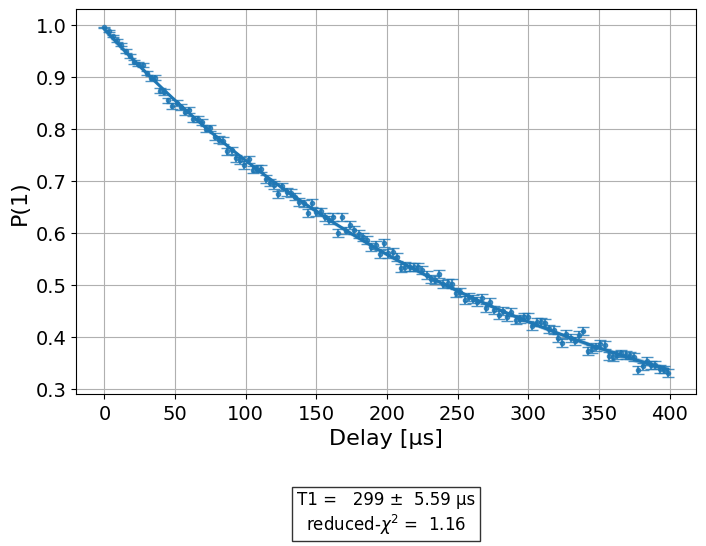

AnalysisResult
- name: T2
- value: 0.000386+/-0.000015
- χ²: 0.9136451167732828
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


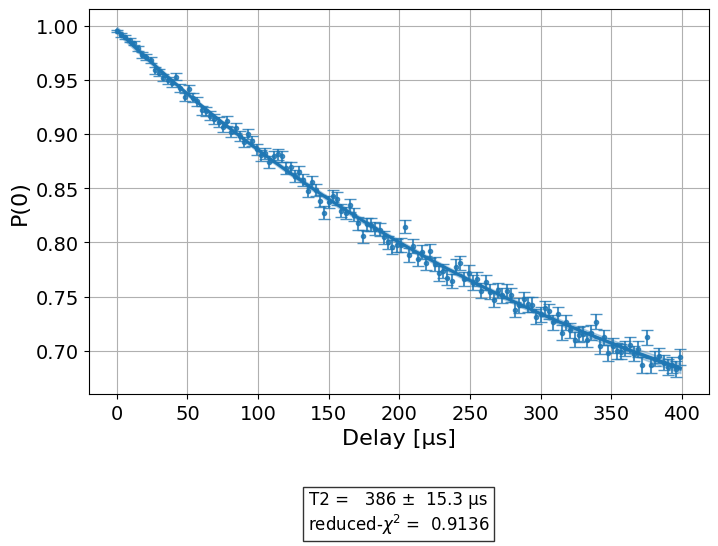

In [ ]:
print(f"Backend name: {backend.name}")# Time intervals to wait before measurement for t1 and t2
delays_t1 = np.arange(0e-6, 600e-6, 3e-6)
delays_t2 = np.arange(0e-6, 600e-6, 3e-6)

exp = Tphi(physical_qubits=(QUBIT,), delays_t1=delays_t1, delays_t2=delays_t2, num_echoes=1)
exp.component_experiment(0).circuits()[-1].draw(output="mpl", style="iqp")
exp.component_experiment(1).circuits()[-1].draw(output="mpl", style="iqp")
expdata = exp.run(backend=backend).block_for_results()
result = expdata.analysis_results("T_phi")
print(result)
print(expdata.analysis_results("T1"))
display(expdata.figure(0))
print(expdata.analysis_results("T2"))
display(expdata.figure(1))

# exp = Tphi(physical_qubits=(QUBIT,),
#             delays_t1=delays_t1,
#             delays_t2=delays_t2,
#             t2type="ramsey",
#             osc_freq=2e7)

# exp.component_experiment(1).circuits()[-1].draw(output="mpl", style="iqp")
# expdata = exp.run(backend=backend).block_for_results()
# print(expdata.analysis_results("T_phi"))
# # display(expdata.figure(0))
# display(expdata.figure(1))



['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__json_decode__', '__json_encode__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_metadata', '_name', '_repr_png_', '_repr_svg_', 'copy', 'figure', 'metadata', 'name']


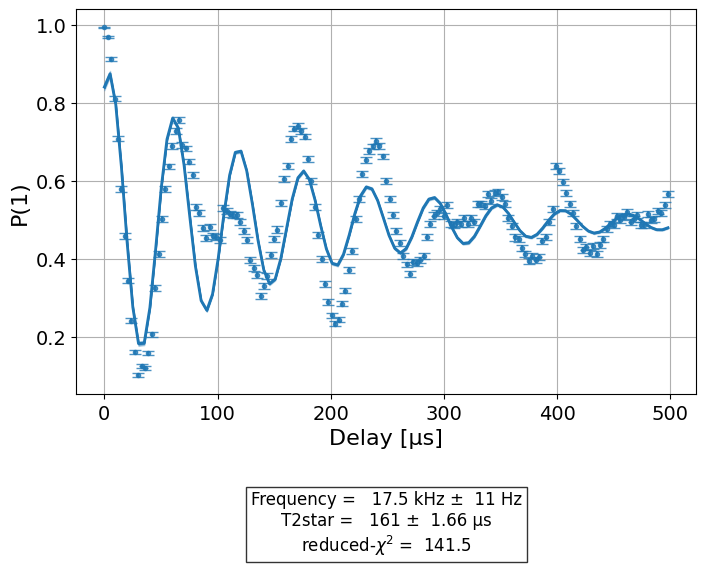

<Figure size 640x480 with 0 Axes>

In [12]:
# Assuming fig is of type `FigureData`
# fig = expdata.figure(1)

# Check if FigureData has a plot method or attribute
print(dir(fig))  # Look for methods like `plot` or attributes containing plot data

# If the figure has a `plot()` method, call it and inspect the figure
display(fig.figure)

# Now access the axes and remove the fit (Matplotlib approach)
ax = fig.figure.gca()  # If `get_figure()` works, use it to get the Matplotlib figure

# Iterate through lines and remove the fit
for line in ax.get_lines():
    if "fit" in line.get_label().lower():  # Adjust based on your plot's labeling
        line.remove()  # Remove the fit line
        break

# Update the figure
plt.draw()

In [ ]:
from qiskit_experiments.library.characterization.t2hahn import T2Hahn
conversion_factor = 1e-6 # our delay will be in micro-sec
delays = list(range(0, 50, 1) )
delays = [float(_) * conversion_factor for _ in delays]
number_of_echoes = 1

# Create a T2Hahn experiment. Print the first circuit as an example
exp1 = T2Hahn(physical_qubits=(QUBIT,), delays=delays, num_echoes=number_of_echoes)
print(exp1.circuits()[0])


In [ ]:
from qiskit_experiments.library.calibration.rough_frequency import RoughFrequencyCal
from qiskit_experiments.calibration_management.calibrations import Calibrations
from qiskit_experiments.calibration_management.basis_gate_library import FixedFrequencyTransmon
import pandas as pd

cals=Calibrations.from_backend(backend)
print(cals.get_inst_map())

def setup_cals(backend) -> Calibrations:

    cals = Calibrations.from_backend(backend)

    dur = Parameter("dur")
    amp = Parameter("amp")
    sigma = Parameter("σ")
    beta = Parameter("β")
    drive = pulse.DriveChannel(Parameter("ch0"))

    # Define and add template schedules.
    with pulse.build(name="xp") as xp:
        pulse.play(pulse.Drag(dur, amp, sigma, beta), drive)

    with pulse.build(name="xm") as xm:
        pulse.play(pulse.Drag(dur, -amp, sigma, beta), drive)

    with pulse.build(name="x90p") as x90p:
        pulse.play(pulse.Drag(dur, Parameter("amp"), sigma, Parameter("β")), drive)

    cals.add_schedule(xp, num_qubits=1)
    cals.add_schedule(xm, num_qubits=1)
    cals.add_schedule(x90p, num_qubits=1)

    return cals

# Add guesses for the parameter values to the calibrations.
def add_parameter_guesses(cals: Calibrations):

    for sched in ["xp", "x90p"]:
        cals.add_parameter_value(80, "σ", schedule=sched)
        cals.add_parameter_value(0.5, "β", schedule=sched)
        cals.add_parameter_value(320, "dur", schedule=sched)
        cals.add_parameter_value(0.5, "amp", schedule=sched)

cals = setup_cals(backend)
add_parameter_guesses(cals)

library = FixedFrequencyTransmon(default_values={"duration": 320})
cals = Calibrations.from_backend(backend, libraries=[library])
print(library.default_values()) # check what parameter values this library has
print(cals.get_inst_map()) # check the new cals's InstructionScheduleMap made from the library
print(cals.get_schedule('x',(0,))) # check one of the schedules built from the new calibration

# dataframe styling
pd.set_option('display.precision', 5)
pd.set_option('display.html.border', 1)
pd.set_option('display.max_colwidth', 24)
columns_to_show = ["parameter", "qubits", "schedule", "value", "date_time"]
pd.DataFrame(**cals.parameters_table(qubit_list=[QUBIT, ()]))[columns_to_show]